# Getting Started
This notebook shows you how to run Principal Component Analysis (PCA) using Python and Numpy, and graph your results using Matplotlib.  Each box shows you a code example of how to do a step.  To run a step, click on that code box and then click the Play button above (just left of the STOP button).

## Step 1: Initial Setup
We first need to get ready to use Numpy, Matplotlib, and define a few convenience functions to make PCA easier. Click on the following code box, and click the Play button above; you should then see a simple graph:

In [1]:
# import the libraries we need
import numpy
from matplotlib import pyplot
from math import cos, sin, pi, sqrt
# make this notebook display graphs automatically
%matplotlib inline
# display large graph area
pyplot.rcParams["figure.figsize"] = 20, 20
pyplot.rcParams.update({'font.size': 22}) # increase font size to be readable!


# define convenience functions
def get_rotation_matrix(theta=0.5, isDegrees=True):
    if isDegrees:
        theta *= pi / 180.
    r = numpy.matrix(((cos(theta), -sin(theta)), (sin(theta), cos(theta))))
    return r

def sort_pca(pca_vars, pca_axes):
    s = list(zip(pca_vars, pca_axes.T))
    s.sort(reverse=True)
    eig_vals2 = numpy.array([t[0] for t in s])
    eig_vecs2 = numpy.matrix([t[1] for t in s]).T
    return eig_vals2, eig_vecs2

def recenter(vecs, normalize=True):
    m = numpy.matrix(vecs).mean(axis=1)
    centered = numpy.array(vecs - m)
    if normalize: # rescale all dimensions to a variance of 1
        rescale = get_rescale_matrix(centered)
        return numpy.array(rescale.I * centered), numpy.array(m), rescale # normalized data, center, scale-matrix
    return centered, numpy.array(m) # unnormalized data, center

def get_rescale_matrix(vecs):
    'make a diagonal matrix with standard deviations'
    c = numpy.cov(vecs)
    m = numpy.matrix(numpy.zeros(c.shape))
    for i in range(c.shape[0]):
        m[i,i] = sqrt(c[i,i])
    return m



# Multidimensional Data Example: Obesity Dataset
## Step 1: Accuracy of Modeling These Data by PCA?
The power of PCA is that it works the same no matter how dimensions (variables) your dataset contains.  Here's a three dimensional dataset giving a sample of people's waist measurements (inches), weight (pounds), and body fat (percent).  First let's examine how well PCA can model these data, using the same approach as we used above:

[2.62690127 0.30484664 0.0682521 ]
[[ 0.60316633  0.06121956  0.79526256]
 [ 0.55956103 -0.74300345 -0.36720202]
 [ 0.56840288  0.66648183 -0.48241075]]


Text(0, 0.5, 'Fraction of Total Variance')

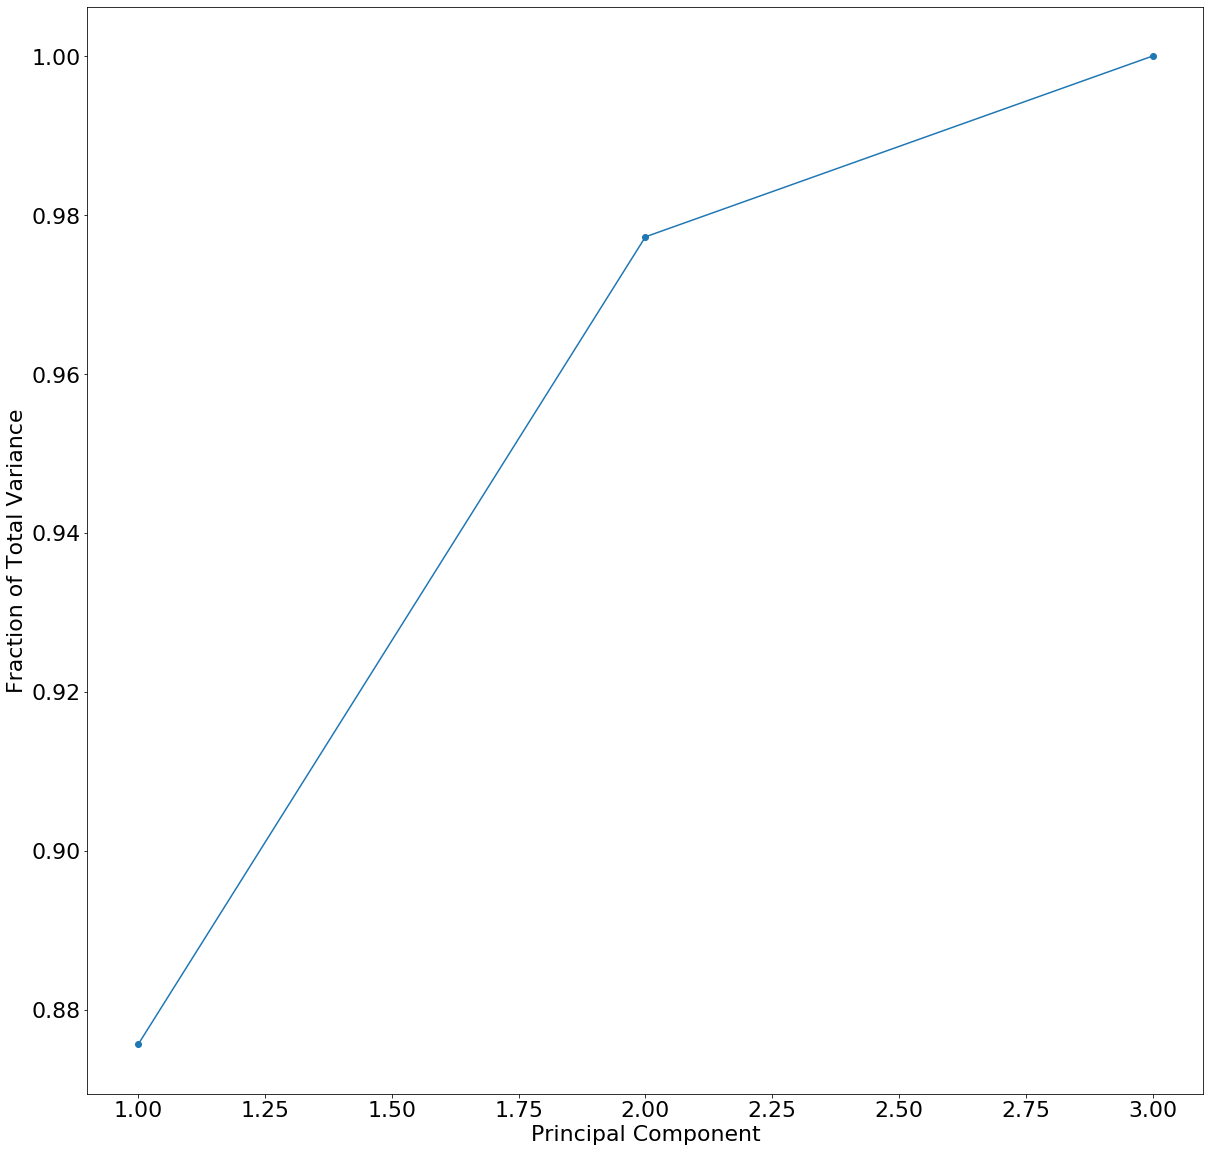

In [2]:
rows = [[32, 175, 6], [36, 181, 21], [38, 200, 15], [33, 159, 6], [39, 196, 22], [40, 192, 31], [41, 205, 32], [35, 173, 21], [38, 187, 25], [38, 188, 30], [33, 188, 10], [40, 240, 20], [36, 175, 22], [32, 168, 9], [44, 246, 38], [33, 160, 10], [41, 215, 27], [34, 159, 12], [34, 146, 10], [44, 219, 28]]
wwb = numpy.array(rows).T # convert to column format
wwbc, wwbm, rescale = recenter(wwb) # normalized coordinates centered on (0,0)
c = numpy.cov(wwbc) # compute covariance matrix
pca_variances, pca_axes = numpy.linalg.eig(c) # compute PCA
pca_variances, pca_axes = sort_pca(pca_variances, pca_axes)
print(pca_variances)
print(pca_axes)
f = pca_variances.cumsum() / sum(pca_variances) # cumulative sum
pyplot.plot((1,2,3), f, marker='o')
pyplot.xlabel('Principal Component')
pyplot.ylabel('Fraction of Total Variance')

### Questions:

* Interpret the meaning of this graph.
* Interpret the meaning of the first principal component (first column of pca_axes).
* Interpret the meaning of the second principal component (second column of pca_axes).

# Step 2: Converting your data to Principal Components, and back

Recall that the PCA matrix $R$ converts principal components coordinates $\vec P=(p_1,p_2,...)$ to real world coordinates $\vec W$:

$\vec W = R \vec P$

In our case $\vec W$ is *(waist, weight, %bodyfat)*.  Hence the inverse matrix $R^{-1}$ converts real-world coordinates to principal components coordinates:

$\vec P = R^{-1} \vec W$

Let's test that on your dataset:

In [3]:
wwbp = numpy.array(pca_axes.I * wwbc) # convert our data to principal components
wwbp

array([[-1.90046695e+00, -2.51090316e-01,  1.07020944e-01,
        -2.07827310e+00,  5.97099709e-01,  1.20604770e+00,
         1.69629587e+00, -5.76969448e-01,  4.28537523e-01,
         7.46697464e-01, -1.23191494e+00,  1.55963755e+00,
        -3.17577027e-01, -1.86907132e+00,  3.38731801e+00,
        -1.81954777e+00,  1.60899169e+00, -1.56368140e+00,
        -1.95538015e+00,  2.22632596e+00],
       [-6.60223745e-01,  2.82065828e-01, -6.33479770e-01,
        -1.98315629e-01, -1.81454367e-02,  7.36569218e-01,
         4.60022297e-01,  4.88967531e-01,  4.25693824e-01,
         7.46277553e-01, -7.27700183e-01, -1.36764219e+00,
         5.18958444e-01, -2.56083732e-01, -2.16282134e-01,
         5.25779392e-02, -1.67099265e-01,  2.35860240e-01,
         4.58751904e-01, -1.60772696e-01],
       [-1.71015742e-01, -1.77098042e-01,  2.80483713e-01,
         2.57639376e-01,  1.90771185e-01,  1.72837736e-04,
        -2.10108791e-02, -2.75218602e-01, -4.49058295e-02,
        -3.10892650e-01, -3.4

Now test that `pca_axes` will convert your `wwbp` data back to match the original `wwbc` values:

In [4]:
numpy.array(pca_axes * wwbp)

array([[-1.3227187 , -0.27502072,  0.24882827, -1.06079421,  0.51075277,
         0.77267726,  1.03460176, -0.53694522,  0.24882827,  0.24882827,
        -1.06079421,  0.77267726, -0.27502072, -1.3227187 ,  1.82037524,
        -1.06079421,  1.03460176, -0.79886971, -0.79886971,  1.82037524],
       [-0.51008138, -0.28504548,  0.42756822, -1.11017713,  0.27754428,
         0.12752035,  0.61509814, -0.58509335, -0.06000957, -0.02250359,
        -0.02250359,  1.92780759, -0.51008138, -0.77262327,  2.15284349,
        -1.07267115,  0.99015798, -1.11017713, -1.59775493,  1.14018192],
       [-1.43775819,  0.13070529, -0.4966801 , -1.43775819,  0.23526952,
         1.17634761,  1.28091184,  0.13070529,  0.54896222,  1.07178338,
        -1.01950126,  0.02614106,  0.23526952, -1.12406549,  1.90829723,
        -1.01950126,  0.75809068, -0.8103728 , -1.01950126,  0.86265491]])

### Converting %bodyfat to PC1, and back

It's very useful to be able to do these conversions with just a subset of your variables.  To do this, all we need is to extract the right submatrix of `pca_axes` matching our desired real-world coordinates (e.g. %bodyfat) to our desired principal component(s).  Here's a simple function that does that:

In [5]:
def get_components(axes, pca_matrix):
    'given N axes, get the first N principal components (projected on those axes)'
    return pca_matrix[axes, :len(axes)]

Here's how we use it to convert %bodyfat to our first principal component:

In [6]:
axes = (2,) # just use %bodyfat (data row 2)
pca_b = get_components(axes, pca_axes) # get PCA column 0 vs. data row 2
print(pca_b)
binv = pca_b.I # inverse rotation matrix for converting %bodyfat to PCA
print(binv)
pc1 = binv * wwbc[axes,] # compute first principal component
print(pc1)

[[0.56840288]]
[[1.7593155]]
[[-2.52947026  0.22995184 -0.873817   -2.52947026  0.41391332  2.06956658
   2.25352805  0.22995184  0.96579774  1.88560511 -1.79362437  0.04599037
   0.41391332 -1.97758584  3.3572969  -1.79362437  1.33372068 -1.42570142
  -1.79362437  1.51768216]]


Next, let's convert `pc1` back into real-world coordinates to make sure that the results really match our original %bodyfat data, by making a scatterplot:

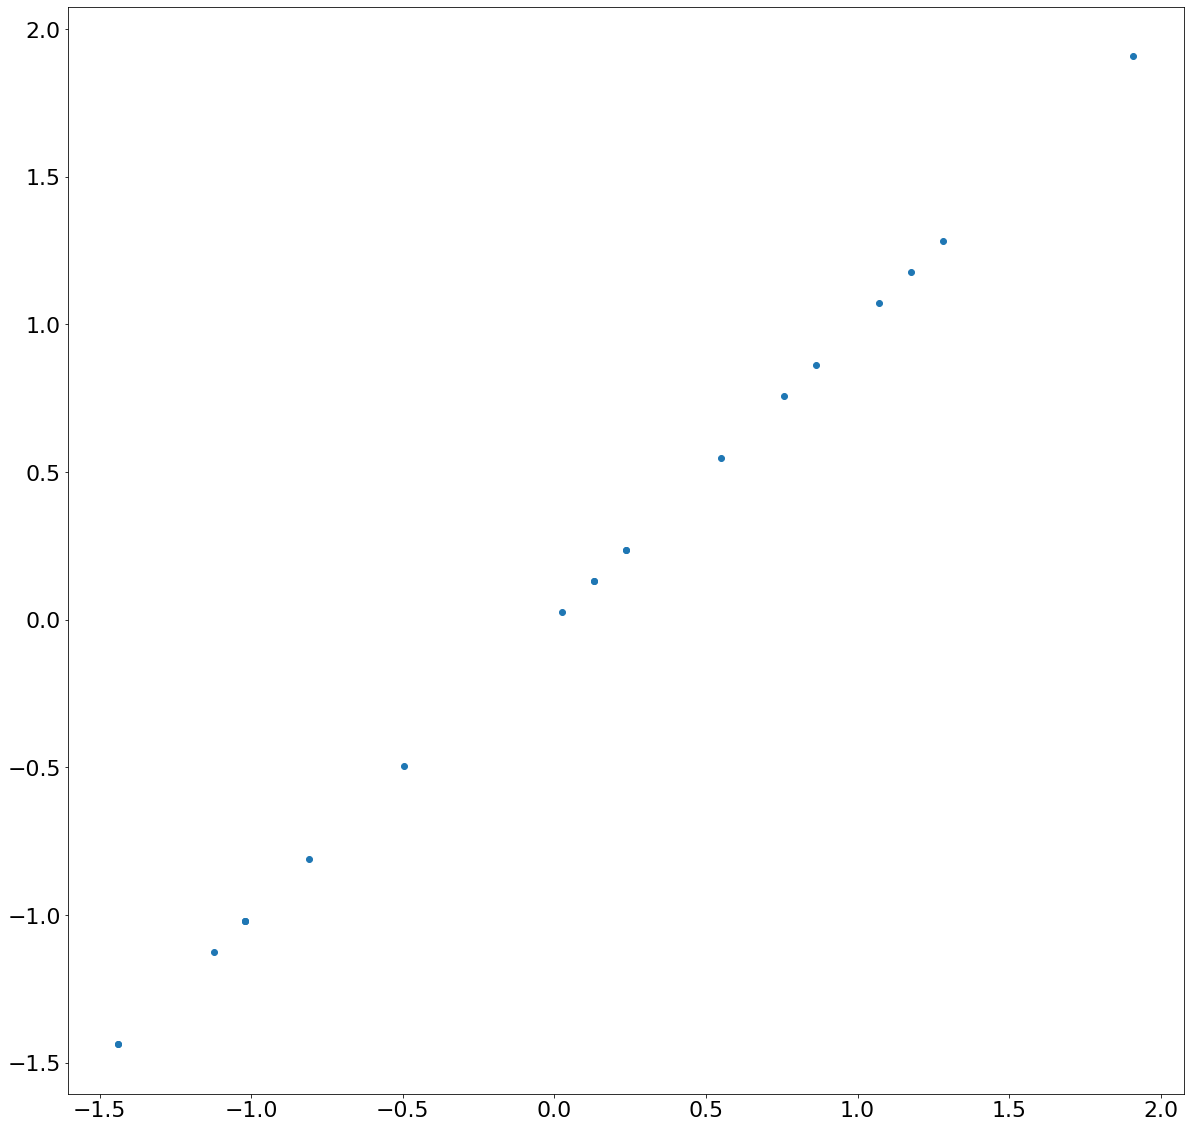

In [8]:
z = numpy.zeros(wwb.shape) # empty dataset (all values zero)
z[:1] = pc1 # insert first principal component values
wwbc2 = numpy.array(pca_axes * z) # predict normalized coordinates
pyplot.plot(numpy.array(wwbc)[2], wwbc2[2], marker='o', linestyle='')

## Step 3: Predicting Waist and Weight from %bodyfat
Computing principal components from just a subset of our variables is really useful, because it enables us to use PCA as a prediction method.  For example, we computed the first principal component value for each %bodyfat value.  Let's look at how well that first principal component predicts the waist and weight measurements for each person.  Rather than looking at normalized values, let's convert them back to actual measurements in inches and pounds:

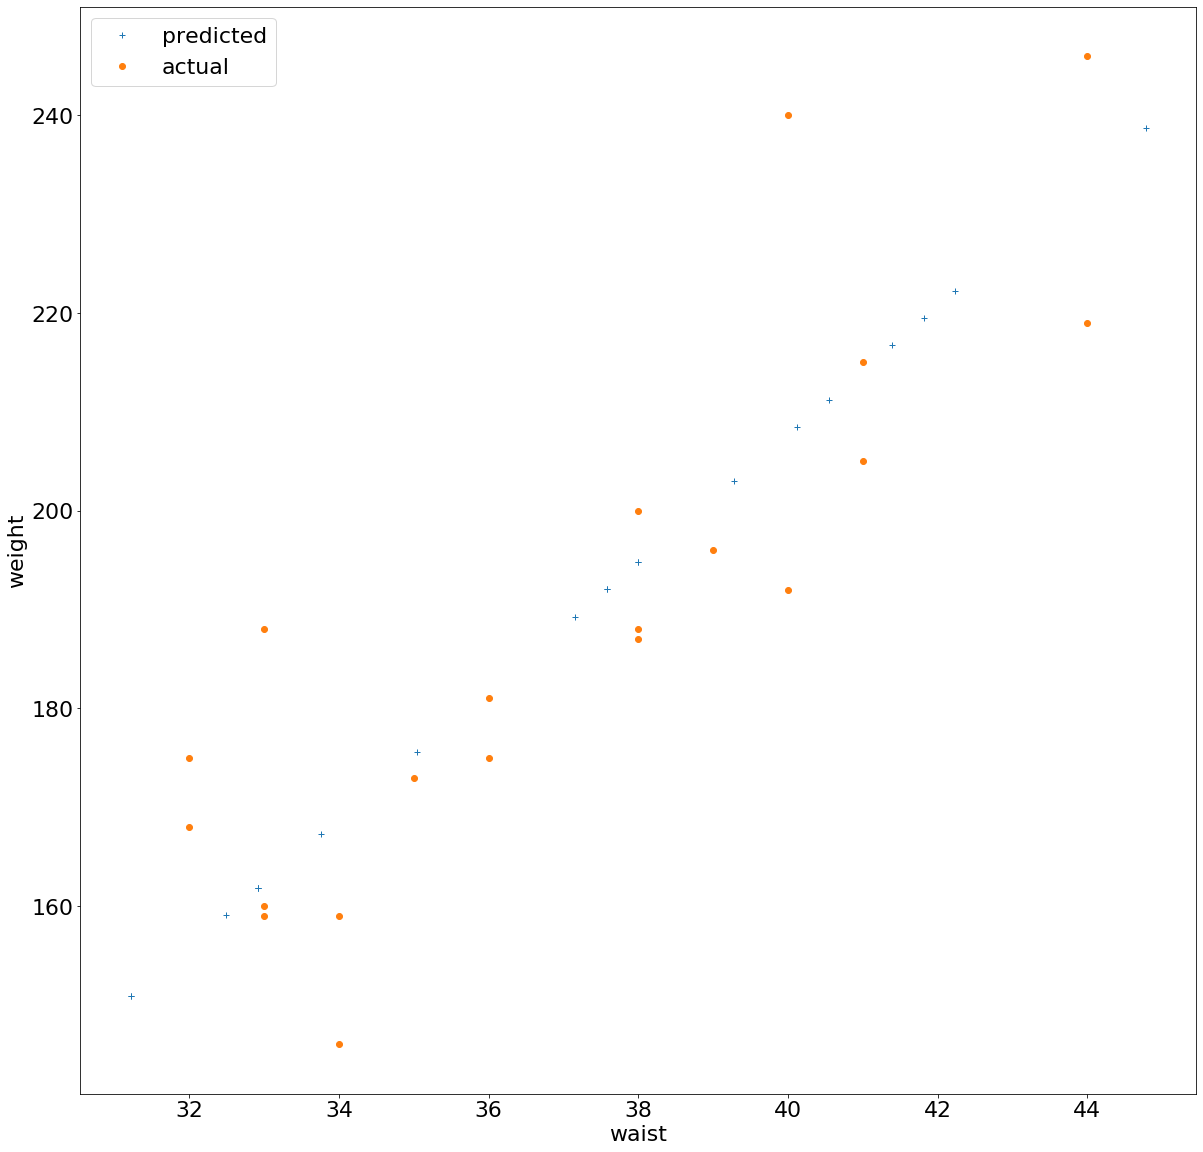

In [9]:
wwb2 = numpy.array(rescale * wwbc2 + wwbm) # predict waist inches and weight pounds
pyplot.plot(wwb2[0], wwb2[1], marker='+', linestyle='', label='predicted')
pyplot.plot(wwb[0], wwb[1], marker='o', linestyle='', label='actual')
pyplot.xlabel('waist')
pyplot.ylabel('weight')
pyplot.legend(loc='upper left')

### Questions

* Why do the predictions lie on a straight line?
* What do you expect to be the average error of these predictions?

Let's compare these predictions vs. the "naive prediction" $(\overline {weight}, \overline {waist})$

* print out the original covariance matrix in the code box below.
* What is the meaning of the diagonal elements of this matrix?

* What is the expected error for the "naive prediction" $(\overline {weight}, \overline {waist})$?
* How much better are your PCA predictions than the "naive prediction" $(\overline {weight}, \overline {waist})$?

# A function for predicting missing data

We can generalize this by copying the code from our previous steps into a function that will predict whatever missing data we want, using the PCA coordinate system:

In [11]:
def predict_missing_data(axes, pca_matrix, partial_data, rescale=False, center=False):
    pca_b = get_components(axes, pca_matrix)
    binv = pca_b.I
    pc = binv * partial_data
    z = numpy.zeros((pca_matrix.shape[0], partial_data.shape[1]))
    z[:len(axes)] = pc
    data = pca_axes * z
    if rescale is not False:
        data = rescale * numpy.array(data)
    if center is not False:
        data = data + center
    return numpy.array(data)

## Step 4: Predicting %bodyfat from waist, weight
The same method can be used to predict all the variables from any subset of variables.  For example, waist and weight are trivial to measure (with just a measuring tape and scale), but %bodyfat is much harder to measure.  So it might be helpful to be able to predict %bodyfat from waist and weight measurements.  We reuse exactly the same procedure as above:

Text(0, 0.5, 'predicted %bodyfat')

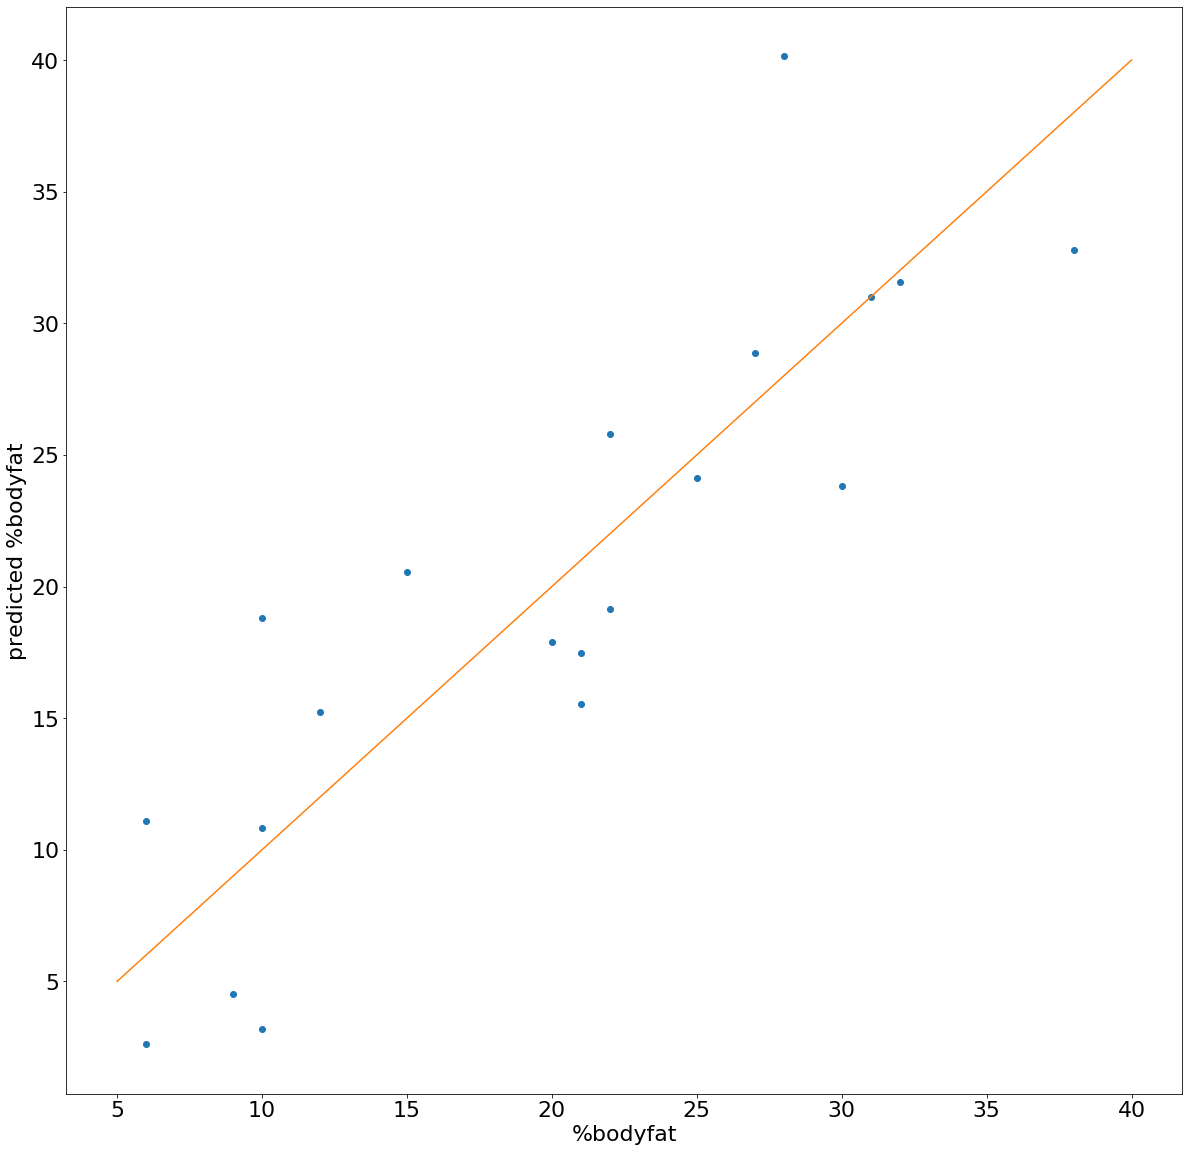

In [12]:
axes = (0,1) # use waist, weight (data rows 0 and 1)
wwb3 = predict_missing_data(axes, pca_axes, wwbc[axes,], rescale, wwbm)
pyplot.plot(wwb[2], wwb3[2], marker='o', linestyle='')
pyplot.plot([5,40], [5,40]) # diagonal line from (5,5) to (40,40)
pyplot.xlabel('%bodyfat')
pyplot.ylabel('predicted %bodyfat')

### Questions

* if the predictions were perfect, what would you expect to see?

## predict_missing_data() step by step

In the cell below, run each line of the calculation shown in `predict_missing_data()` and view its result, to understand exactly what it is doing, before proceeding to the next line, line by line.

In [13]:
pca_b = get_components(axes, pca_axes) # equivalent to running first line of predict_missing_data()
print(pca_b)
# type more code here

[[ 0.60316633  0.06121956]
 [ 0.55956103 -0.74300345]]
